Conc: 25 Mu: 8.65934300620607 Std: 1.0140834093146927
Conc: 400 Mu: 9.791980188815272 Std: 1.0341414073581094
Conc: 800 Mu: 9.936518165201411 Std: 0.9154977338938213


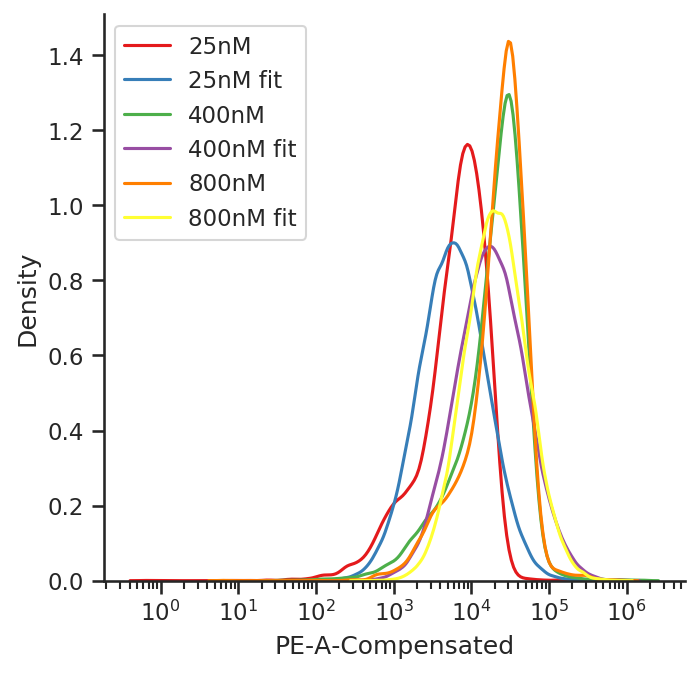

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

plot_fit = True
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.dpi": 150,
    "savefig.dpi": 300,
}
sns.set(rc=custom_params, style="ticks", palette="Set1")
plt.figure(figsize=(5, 5))
conc = [25, 400, 800]

for c in conc:
    df = pd.read_csv("sigma/4A8UCA_" + str(c) + "nM.csv")
    sns.kdeplot(
        x="PE-A-Compensated",
        data=df,
        log_scale=10,
        label=str(c) + "nM",
        fill=False,
        palette="crest",
    )
    data = []

    for i in df["PE-A-Compensated"]:
        try:
            np.log(i)
            if np.isfinite(np.log(i)):
                data.append(np.log(i))
            else:
                continue
        except:
            continue

    mu, std = norm.fit(data)
    print("Conc:", c, "Mu:", mu, "Std:", std)
    if plot_fit:
        num_to_sample = 100000
        guess = np.random.lognormal(mu, std, num_to_sample)
        sns.kdeplot(guess, log_scale=10, label=str(c) + "nM fit")

plt.legend(loc="upper left")
plt.show()